In [580]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [581]:
data=pd.read_csv('ex1data1.txt')

In [582]:
data.head()

,6.1101,17.592
0,5.5277,9.1302
1,8.5186,13.6620
2,7.0032,11.8540
3,5.8598,6.8233
4,8.3829,11.8860


In [583]:
x=data.iloc[:,:-1].values
y=data.iloc[:,-1].values
#now X and Y are list types

In [584]:
#now setting parameters for linear regression
m=len(x);
X=np.column_stack([np.ones((m,1)),x])
Y=y
theta_ini=np.zeros((X.shape[1],))
niter=1500
alpha=0.01

In [585]:
def cost_func(X,Y,theta):
    m=len(X)
    a=np.dot(X,theta)-Y
    return (np.dot(a,a.T)/(2*m))

In [586]:
def Gradient_descent(X,Y,theta,alpha,niter):
    m=len(x)
    J=np.zeros((niter,1))
    for i in range(niter):
        for j in range(len(theta)):
            theta[j]=theta[j] - (alpha/m) * np.dot((np.dot(X,theta)-y),X[:,j])
        J[i]=cost_func(X,Y,theta)
      
    return(theta,J)
        

In [587]:
[theta,J]=Gradient_descent(X,Y,theta_ini,alpha,niter)

In [588]:
theta

array([-3.93264994,  1.18566812])

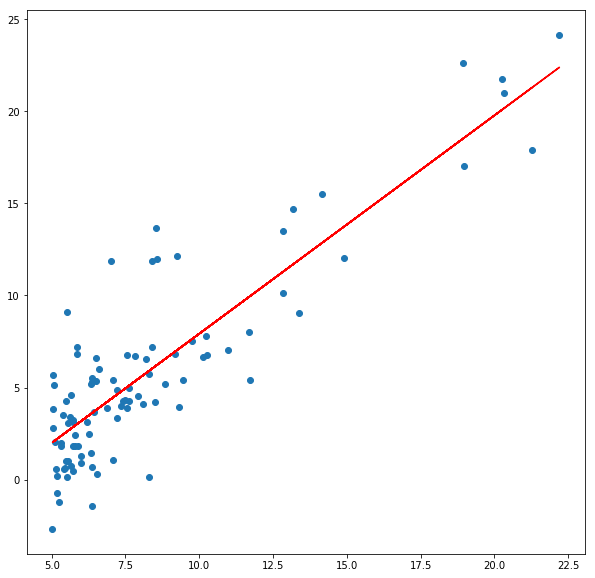

In [589]:
plt.figure(figsize=(10,10))
plt.scatter(x,y)
plt.plot(x,np.dot(X,theta),'r')

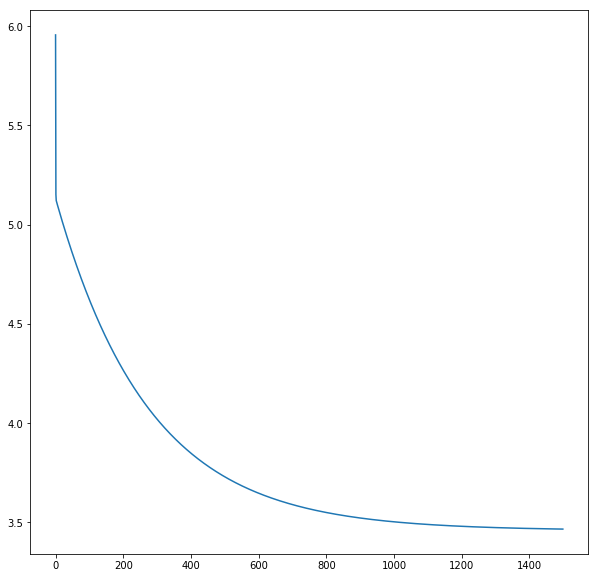

In [590]:
plt.figure(figsize=(10,10))
plt.plot(J)

In [591]:
predict1 = np.dot([1, 4.5],theta);
predict2 = np.dot([1,7],theta)
print("For population = 45,000, we predict a profit of {}\n".format(predict1*10000))
print("For population = 70,000, we predict a profit of {}\n".format(predict2*10000))

For population = 45,000, we predict a profit of 14028.566167163437

For population = 70,000, we predict a profit of 43670.26928027045



In [592]:
from sklearn.linear_model import LinearRegression 

In [593]:
lm=LinearRegression()

In [594]:
lm.fit(x,Y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [595]:
print("using sklearn inbulit function to predict house price\n")
print("For population = 45,000, we predict a profit of {}\n".format(lm.predict(4.5)*10000))
print("For population = 70,000, we predict a profit of {}\n".format(lm.predict(7.0)*10000))

using sklearn inbulit function to predict house price

For population = 45,000, we predict a profit of [ 12494.58637164]

For population = 70,000, we predict a profit of [ 42833.26771934]



In [596]:
theta0=np.linspace(-10,10,150)
theta1=np.linspace(-1,4,150)

In [597]:
J_vals=np.zeros((len(theta0),len(theta1)))

In [598]:
for i in range(len(theta0)):
    for j in range(len(theta1)):
        t=np.array([theta0[i],theta1[j]])
        J_vals[i][j]=cost_func(X,y,t)
        

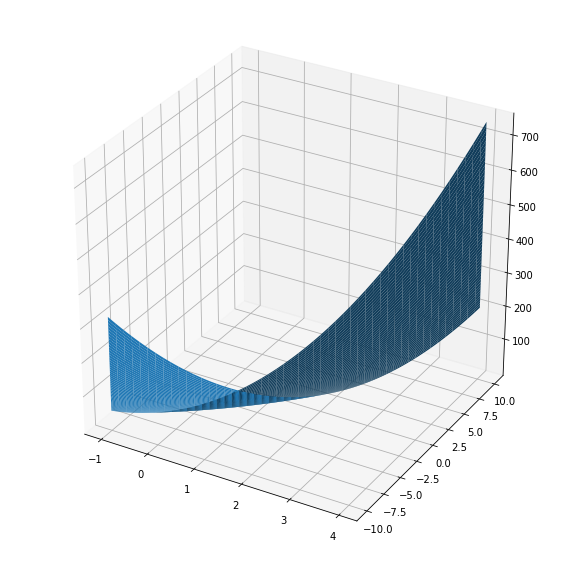

In [599]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10,10))
ax=fig.add_subplot(111,projection='3d')
ax.plot_surface(theta1,theta0,J_vals)

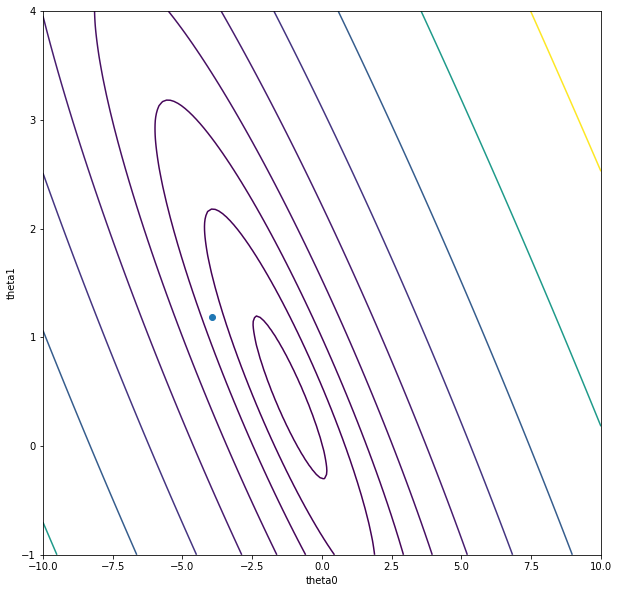

In [600]:
plt.figure(figsize=(10,10))
plt.contour(theta0,theta1,J_vals,np.logspace(-2,3,20))
plt.scatter(theta[0],theta[1])
plt.xlabel('theta0');
plt.ylabel('theta1');

In [601]:
print(lm.intercept_)
print('\n')
print(theta[0])


-4.21150400542


-3.93264994364
